In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

A feeling of happiness while self introspecting is the major reason we indulge in our hobbies and choose places to live.

Data Dictionary:-

- infoavail = the availability of information about the city services
- housecost = the cost of housing
- schoolquality = the overall quality of public schools
- policetrust = your trust in the local police
- streetquality = the maintenance of streets and sidewalks
- events = the availability of social community events
- happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)

In [2]:
url = 'happydata.csv'
df = pd.read_csv(url)
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


<Figure size 400x400 with 0 Axes>

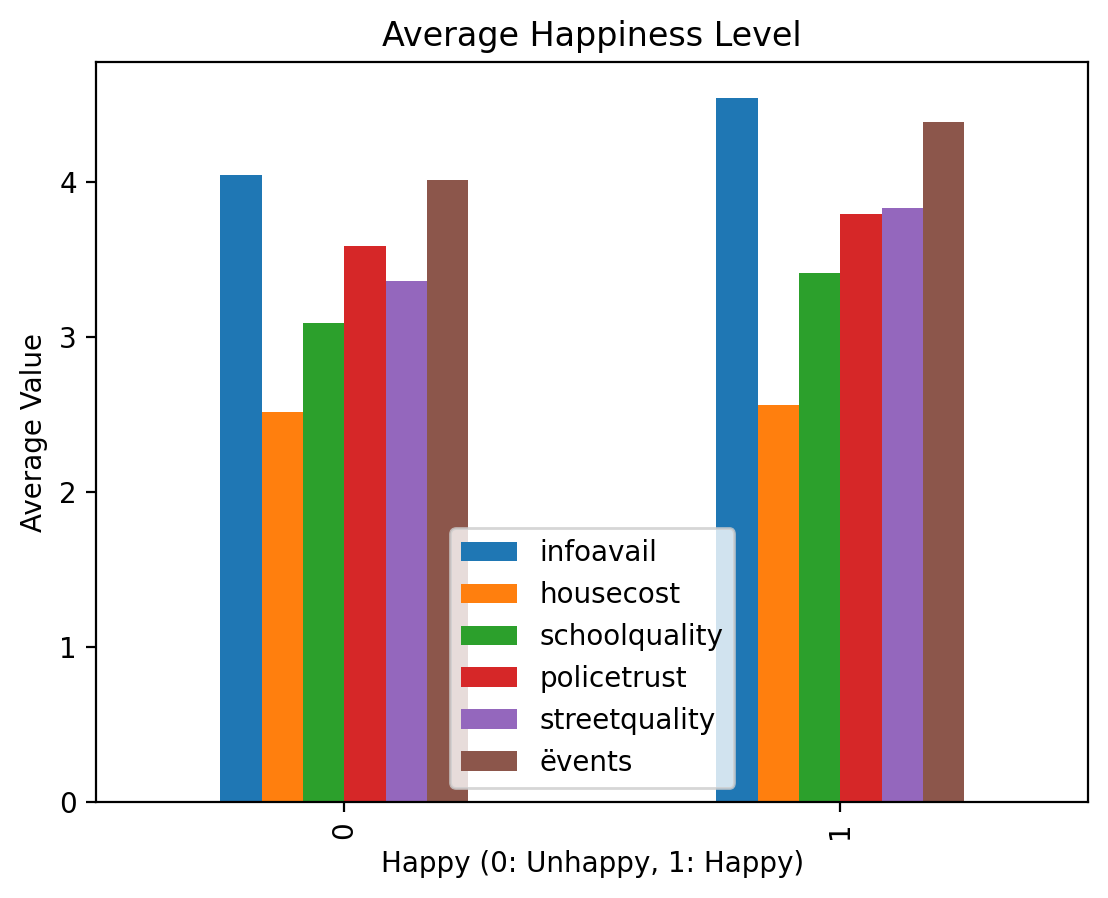

In [4]:
plt.figure(figsize=(4, 4))
df.groupby(df.happy).mean().plot(kind='bar')
plt.title('Average Happiness Level')
plt.xlabel('Happy (0: Unhappy, 1: Happy)')
plt.ylabel('Average Value')
plt.show();

In [5]:
def hist_figure(col_name: str, title_str: str, hue_flag: bool=False):
    #plt.figure(figsize=(6, 5),dpi=80)

    if hue_flag:
        ax = sns.countplot(x=col_name, data=df, hue=df.happy)
    else:
        ax = sns.countplot(x=col_name, data=df)
    
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(title_str)

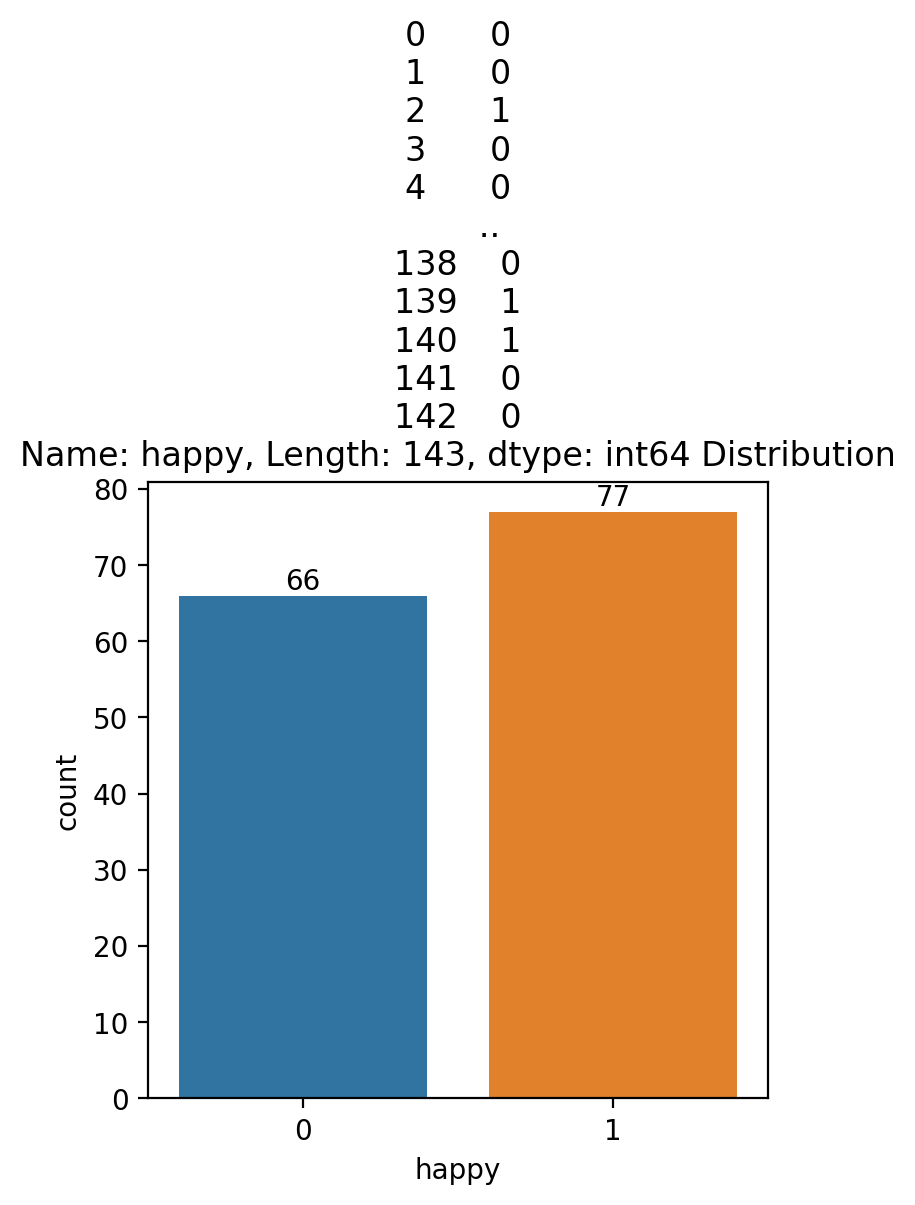

In [6]:
plt.figure(figsize=(4, 4))
hist_figure(col_name=df.happy, title_str=f'{df.happy} Distribution');

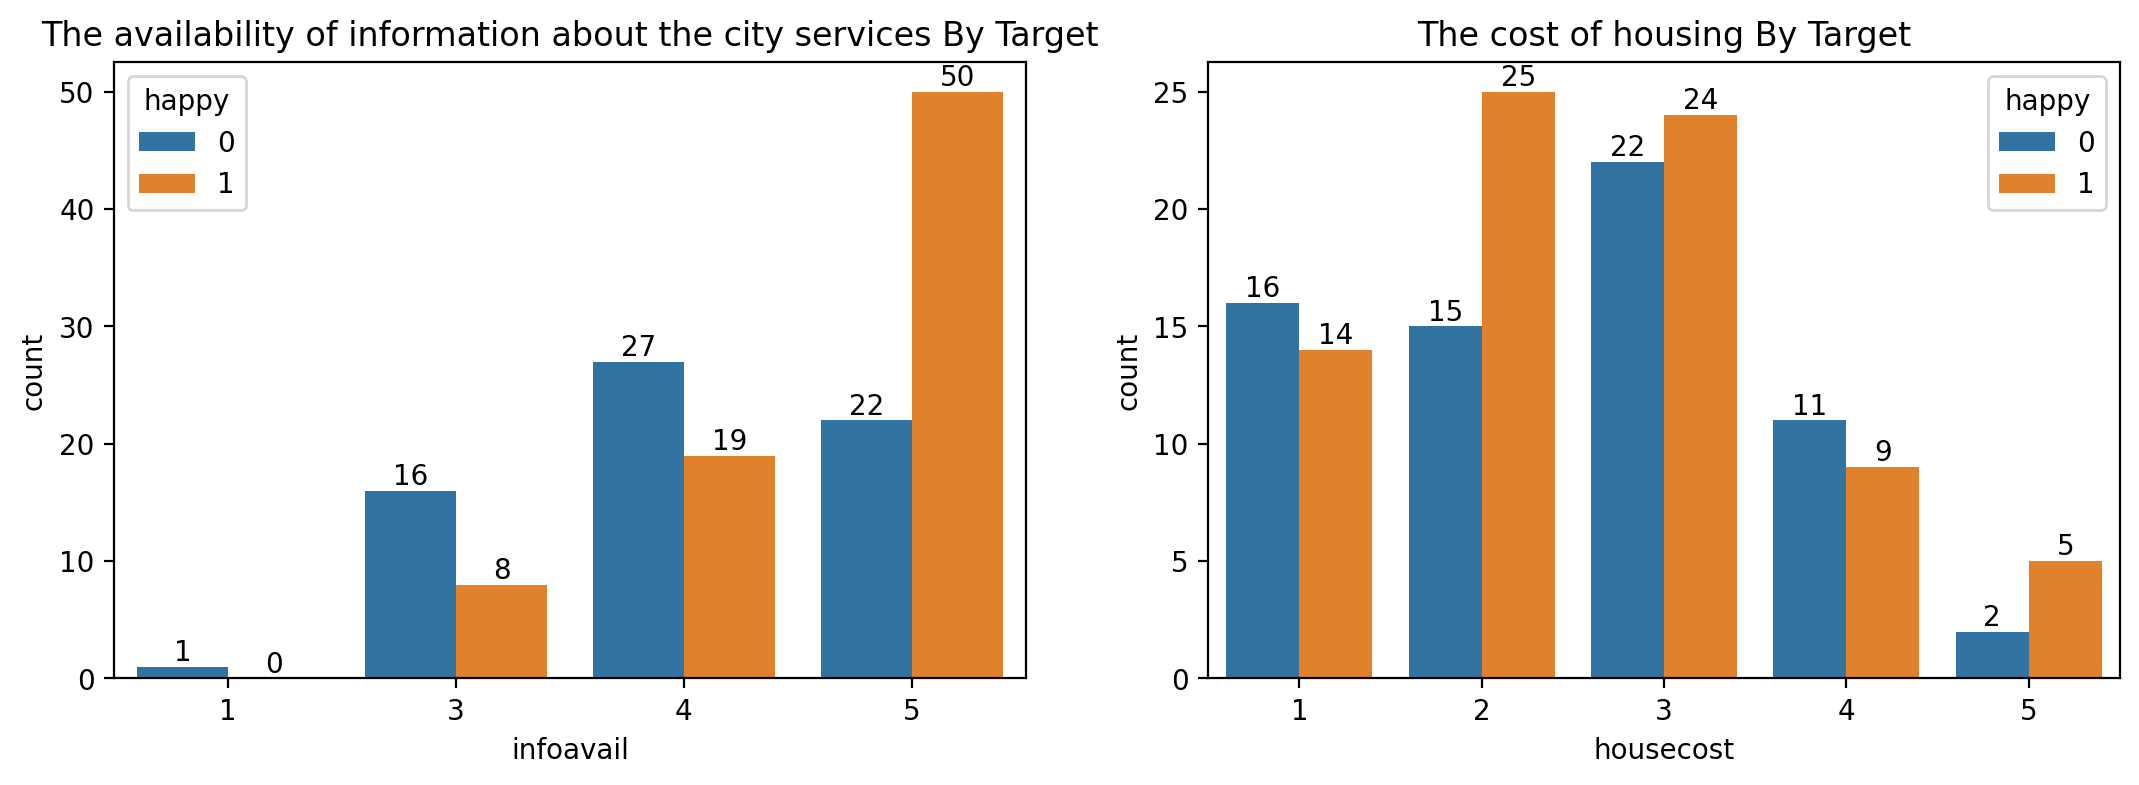

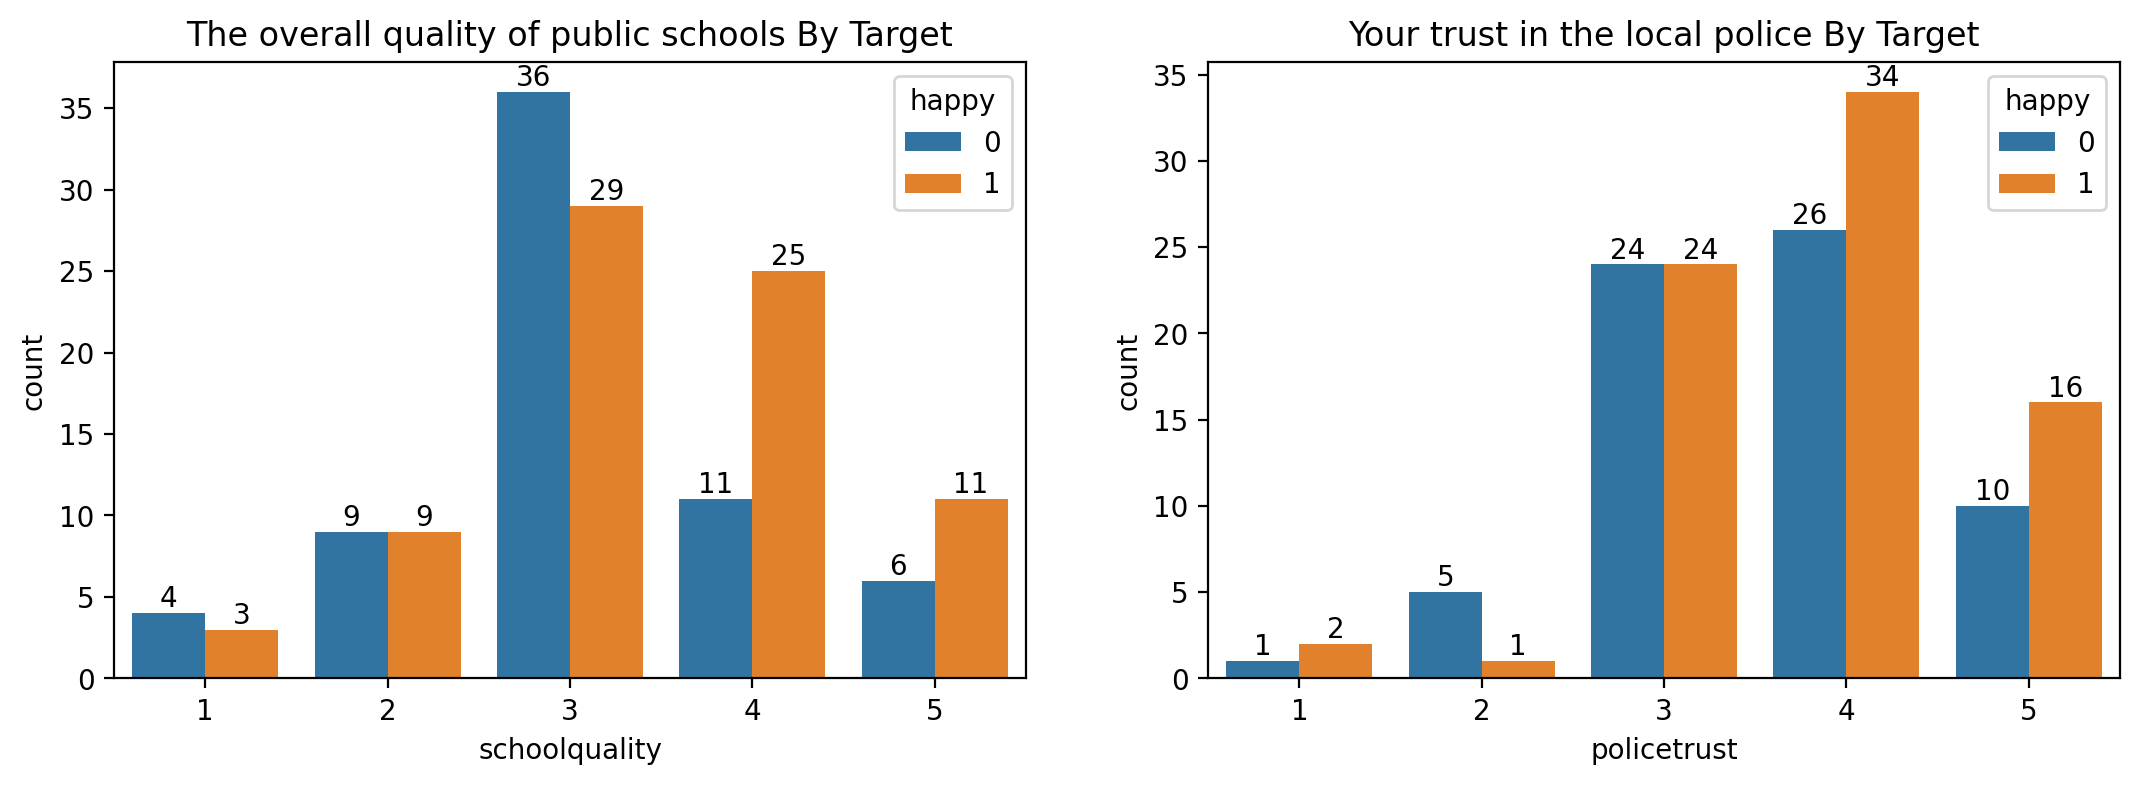

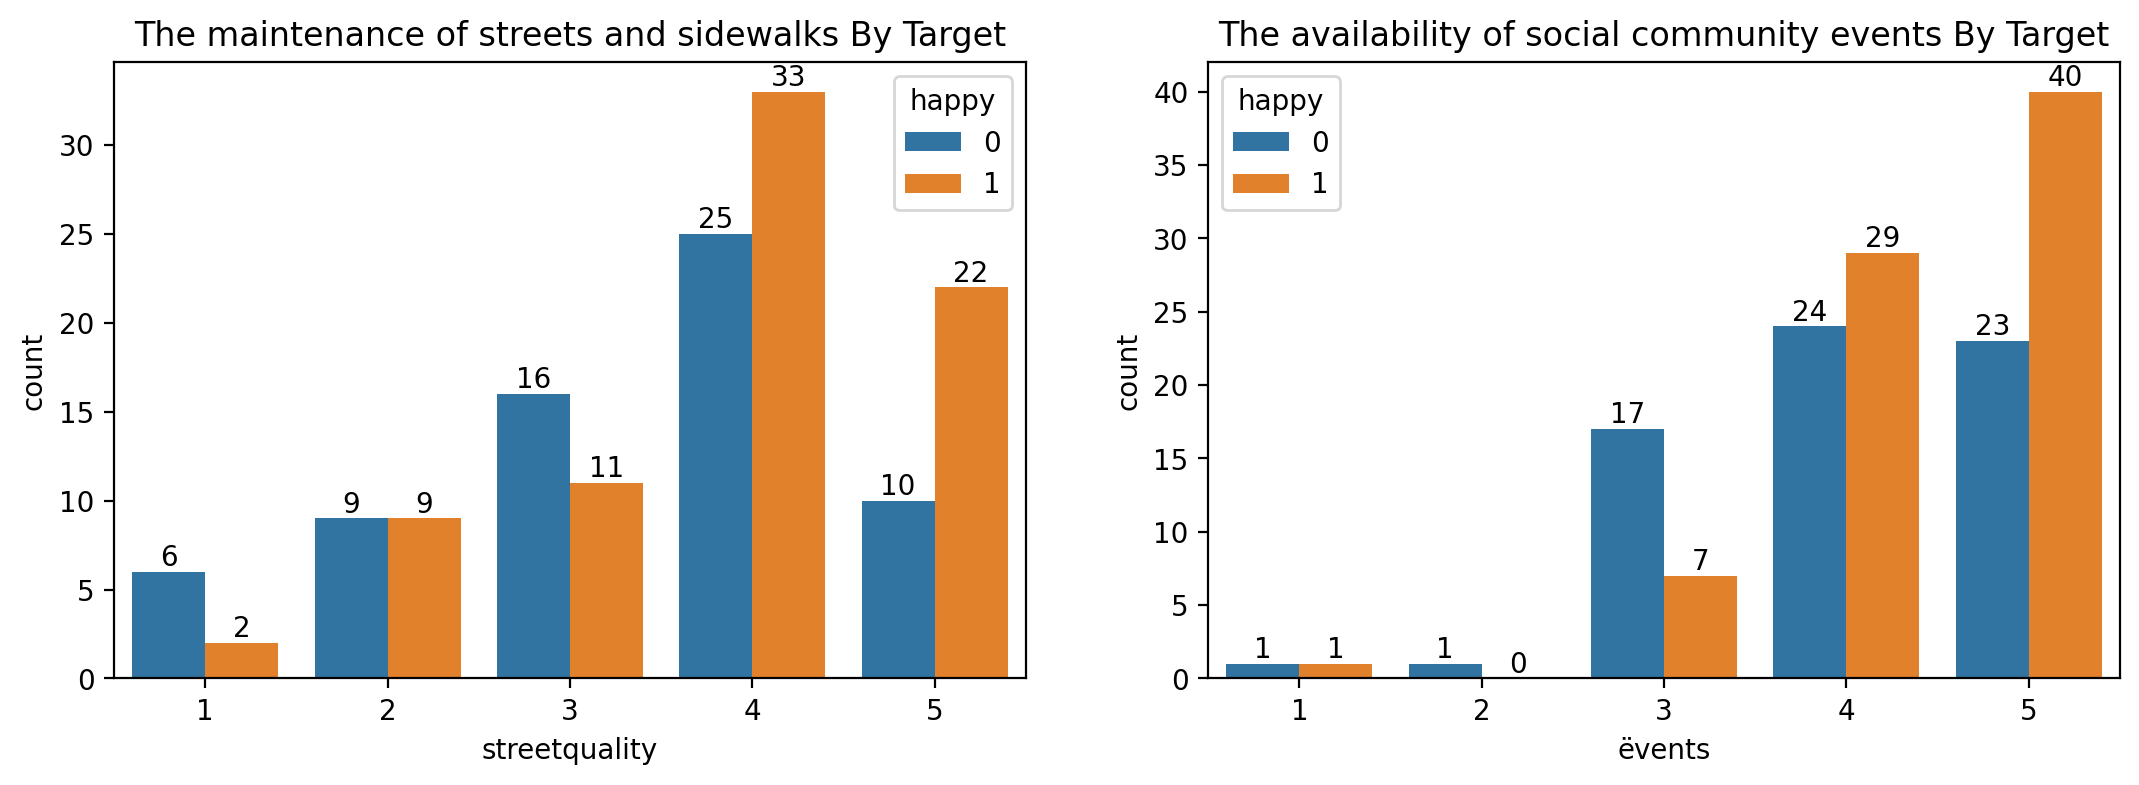

In [7]:
dict_cols = {
    'infoavail': 'The availability of information about the city services By Target',
    'housecost': 'The cost of housing By Target',
    'schoolquality': 'The overall quality of public schools By Target',
    'policetrust': 'Your trust in the local police By Target',
    'streetquality': 'The maintenance of streets and sidewalks By Target',
    'ëvents': 'The availability of social community events By Target',
}

count_cols = len(dict_cols) // 2 if len(dict_cols) % 2 == 0 else len(dict_cols) // 2 + 1

keys = list(dict_cols.keys())
values = list(dict_cols.values())
for i in [i for i in range(0, len(keys), 2)]:
    fig = plt.figure(figsize=(20, 4))

    plt.subplot(1, count_cols, 1)
    hist_figure(keys[i], values[i], True)

    if i + 1 < len(dict_cols):
        plt.subplot(1, count_cols, 2)
        hist_figure(keys[i+1], values[i+1], True)

In [8]:
# sns.pairplot(df, kind = 'reg', plot_kws = {'scatter_kws': {'alpha': .4}, 'line_kws': {'color': 'orange'}}, diag_kws = {'color': 'green', 'alpha': .2});

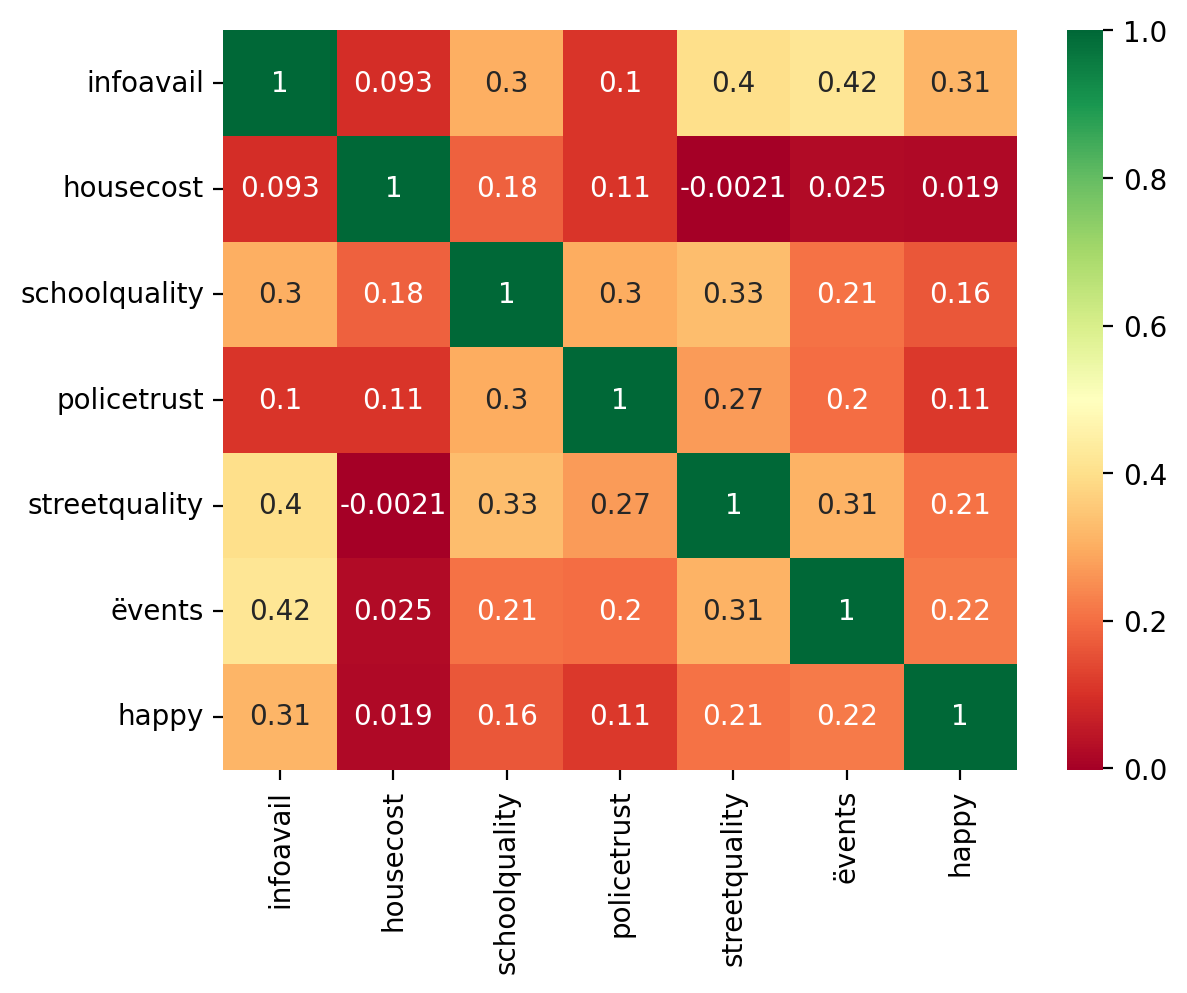

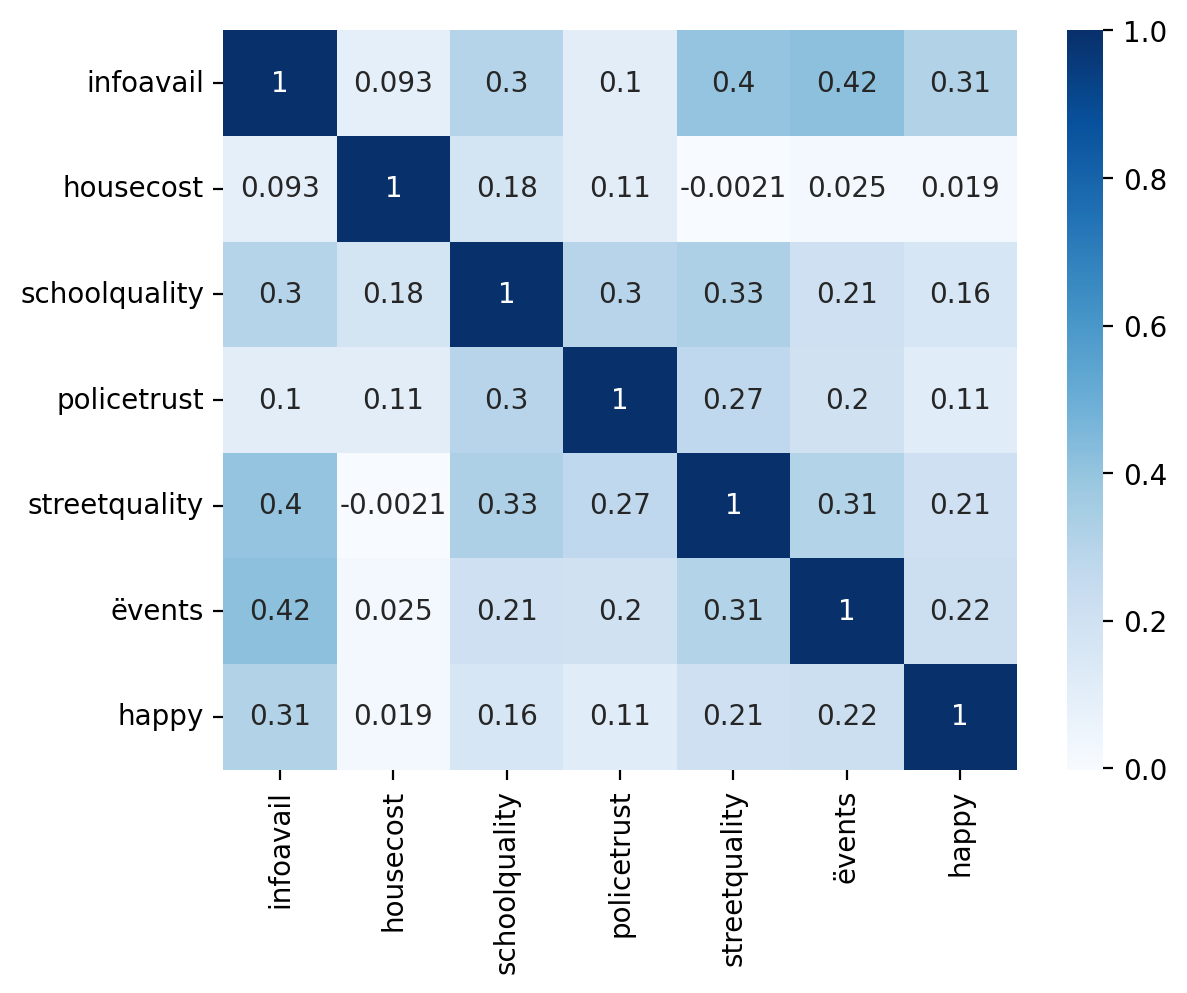

In [9]:
correlation = df.corr()
sns.heatmap(correlation, cmap="RdYlGn", annot=True)
plt.show();
sns.heatmap(correlation, cmap="Blues", annot=True)
plt.show();

In [10]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [11]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

In [12]:
model = ExtraTreesClassifier(n_estimators = 250, random_state = 7)
X = df[['infoavail', 'housecost', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']]
y = df['happy']
model.fit(X,y)

ExtraTreesClassifier(n_estimators=250, random_state=7)

In [13]:
model.feature_importances_

array([0.17861549, 0.19404086, 0.18778677, 0.15145777, 0.15619377,
       0.13190533])

In [14]:
fs = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
fs

housecost        0.194041
schoolquality    0.187787
infoavail        0.178615
streetquality    0.156194
policetrust      0.151458
ëvents           0.131905
dtype: float64

In [15]:
fs.sum()

1.0

<Axes: >

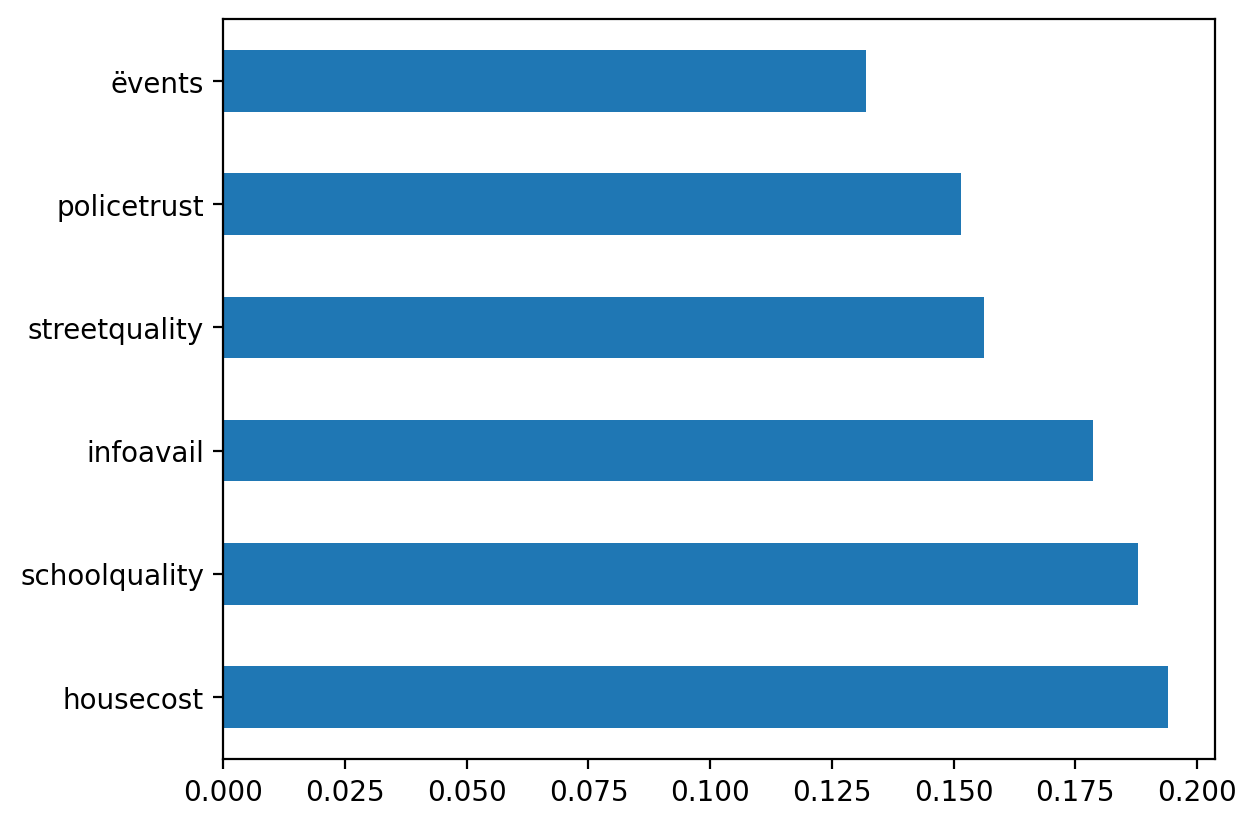

In [16]:
fs.plot(kind='barh')

In [17]:
fs[fs>.15]

housecost        0.194041
schoolquality    0.187787
infoavail        0.178615
streetquality    0.156194
policetrust      0.151458
dtype: float64

In [18]:
fs.nlargest(4)

housecost        0.194041
schoolquality    0.187787
infoavail        0.178615
streetquality    0.156194
dtype: float64

In [19]:
fs[fs>.15].index

Index(['housecost', 'schoolquality', 'infoavail', 'streetquality',
       'policetrust'],
      dtype='object')

In [20]:
X=df[fs[fs>.15].index]
X.head()

,housecost,schoolquality,infoavail,streetquality,policetrust
0,3,3,3,2,4
1,2,3,3,4,5
2,3,3,5,3,3
3,4,3,5,3,3
4,4,3,5,3,3


In [21]:
X = df[['housecost', 'schoolquality', 'infoavail', 'streetquality']]
y = df['happy']

## stratify : random and make records stratify with y

In [22]:
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,stratify=y,random_state=7)
# 

In [23]:
algo=[
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [Perceptron(), 'Perceptron'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    [GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [BaggingClassifier(), 'BaggingClassifier'],
    [AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    [MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    [GaussianProcessClassifier(), 'GaussianProcessClassifier']
]

## scikit-learn : confusion matrix

In [24]:

model_scores_top_4=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores_top_4.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores_top_4)
print(f'best score = {max(model_scores_top_4)}')

KNeighborsClassifier score: 0.6744
[[10 10]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.66      0.83      0.73        23

    accuracy                           0.67        43
   macro avg       0.68      0.66      0.66        43
weighted avg       0.68      0.67      0.66        43

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.5581
[[ 9 11]
 [ 8 15]]
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        20
           1       0.58      0.65      0.61        23

    accuracy                           0.56        43
   macro avg       0.55      0.55      0.55        43
weighted avg       0.55      0.56      0.55        43

----------------------------------------------------------------------------------------------------
Perceptron           score: 0.5581
[

/Users/sophea/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:

X = df[['infoavail', 'housecost', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']]
y = df['happy']
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,stratify=y,random_state=7)
# 

In [26]:

model_scores_all_features=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores_all_features.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores_all_features)
print(f'best score = {max(model_scores_all_features)}')

KNeighborsClassifier score: 0.6047
[[ 8 12]
 [ 5 18]]
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.60      0.78      0.68        23

    accuracy                           0.60        43
   macro avg       0.61      0.59      0.58        43
weighted avg       0.61      0.60      0.59        43

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.5349
[[ 7 13]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        20
           1       0.55      0.70      0.62        23

    accuracy                           0.53        43
   macro avg       0.53      0.52      0.51        43
weighted avg       0.53      0.53      0.52        43

----------------------------------------------------------------------------------------------------
Perceptron           score: 0.4651
[

In [27]:

X = df[fs[fs>.15].index]
y = df['happy']
test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,stratify=y,random_state=7)
# 

In [28]:

model_scores_greater_=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores_greater_.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]:20} score: {score:.04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

print(model_scores_greater_)
print(f'best score = {max(model_scores_greater_)}')

KNeighborsClassifier score: 0.5581
[[ 8 12]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.57      0.70      0.63        23

    accuracy                           0.56        43
   macro avg       0.55      0.55      0.54        43
weighted avg       0.55      0.56      0.55        43

----------------------------------------------------------------------------------------------------
LogisticRegression   score: 0.5581
[[ 8 12]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.57      0.70      0.63        23

    accuracy                           0.56        43
   macro avg       0.55      0.55      0.54        43
weighted avg       0.55      0.56      0.55        43

----------------------------------------------------------------------------------------------------
Perceptron           score: 0.4651
[

/Users/sophea/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sophea/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sophea/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
model_top_4 = pd.Series((v[0] for v in model_scores_top_4),(v[1] for v in model_scores_top_4)).sort_values(ascending=False)
model_top_4

RandomForestClassifier        0.767442
GradientBoostingClassifier    0.697674
KNeighborsClassifier          0.674419
DecisionTreeClassifier        0.674419
BaggingClassifier             0.627907
AdaBoostClassifier            0.627907
GaussianProcessClassifier     0.627907
MLPClassifier                 0.604651
LogisticRegression            0.558140
Perceptron                    0.558140
SVC_linear                    0.534884
GaussianNB                    0.511628
dtype: float64

In [30]:
model_greater_ = pd.Series((v[0] for v in model_scores_greater_),(v[1] for v in model_scores_greater_)).sort_values(ascending=False)
model_greater_

GradientBoostingClassifier    0.697674
BaggingClassifier             0.627907
AdaBoostClassifier            0.627907
GaussianProcessClassifier     0.627907
DecisionTreeClassifier        0.604651
RandomForestClassifier        0.581395
KNeighborsClassifier          0.558140
LogisticRegression            0.558140
SVC_linear                    0.558140
GaussianNB                    0.534884
MLPClassifier                 0.534884
Perceptron                    0.465116
dtype: float64

In [31]:

model_all_features = pd.Series((v[0] for v in model_scores_all_features),(v[1] for v in model_scores_all_features)).sort_values(ascending=False)
model_all_features

AdaBoostClassifier            0.627907
KNeighborsClassifier          0.604651
GradientBoostingClassifier    0.581395
GaussianProcessClassifier     0.581395
LogisticRegression            0.534884
BaggingClassifier             0.534884
GaussianNB                    0.534884
SVC_linear                    0.534884
RandomForestClassifier        0.511628
MLPClassifier                 0.511628
Perceptron                    0.465116
DecisionTreeClassifier        0.441860
dtype: float64